In [1]:
import pandas as pd
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt

In [5]:
alternative_types = pd.read_excel("Alternative_asset_type.xls")
bond_holdings = pd.read_excel("Bond_Holdings_Life_Insurance.xls")
bond_yields = pd.read_excel("Bond_Yield_Life_Insurance.xls")
cash_holdings = pd.read_excel("Net_Cash_Invested_assets.xls")
cash_yields = pd.read_excel("Net_Yield_all_investment_Life_Insurance.xls")
other_holdings = pd.read_excel("Other_assets_allocation_insurance_Life_Insurance.xls")
other_yields = pd.read_excel("Gross_Yield_Other_assets_investment_Life_Insurance.xls")

### Sort Asset Type by Traditional and Alternative Assets

In [7]:
def groupby_traditional_and_alternative(df):
    df = df.dropna(how='all')
    df = df.drop(df.columns[[0, 1, 2, 3, 4]], axis=1)
    df = df.drop([1,2])
    df = df.reset_index(drop=True)
    
    year_list = df.iloc[0].tolist()
    df_data = {}
    for year in year_list:
        df_data[year] = {}
    
    #create dictionary for different asset types
    for column_index in range(0, len(df.columns)):
        year = df.iloc[0, column_index]
        df_data[year]["Traditional Assets"] = 0
        df_data[year]["Alternative Assets"] = 0
        for row_index in range(1, len(df)):
            value = str(df.iloc[row_index, column_index])
            if pd.isna(value) == True:
                continue
            elif "Stock" in value:
                df_data[year]["Traditional Assets"] += 1
            elif "Bond" in value:
                df_data[year]["Traditional Assets"] += 1
            elif value == "Capital Notes":
                df_data[year]["Traditional Assets"] += 1
            else:
                df_data[year]["Alternative Assets"] += 1
            

    df = pd.DataFrame.from_dict(df_data)
            
    return df

In [9]:
alternative_types = pd.read_excel("Alternative_asset_type.xls")
alternative_types_grouped = groupby_traditional_and_alternative(alternative_types)
print(alternative_types_grouped)

                    2023 Y  2022 Y  2021 Y  2020 Y  2019 Y  2018 Y  2017 Y  \
Traditional Assets    2547    2494    2444    2284    2129    1877    1835   
Alternative Assets   14186   14239   14289   14449   14604   14856   14898   

                    2016 Y  2015 Y  2014 Y  ...  2012 Y  2011 Y  2010 Y  \
Traditional Assets    1774    1646    1642  ...    1424    1357    1335   
Alternative Assets   14959   15087   15091  ...   15309   15376   15398   

                    2009 Y  2008 Y  2007 Y  2006 Y  2005 Y  2004 Y  2003 Y  
Traditional Assets    1360    1354    1315    1243    1205     973       0  
Alternative Assets   15373   15379   15418   15490   15528   15760   16733  

[2 rows x 21 columns]


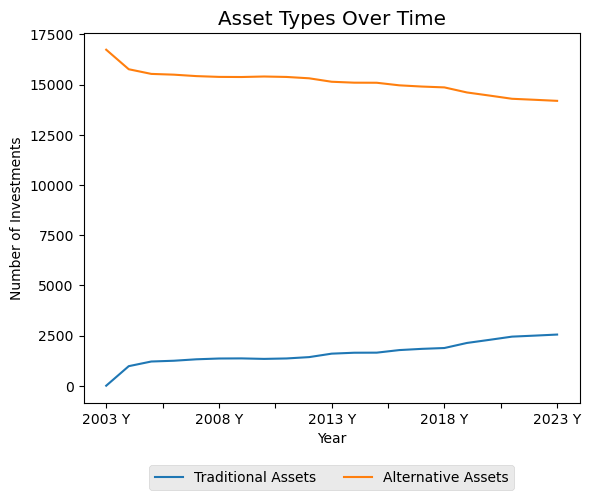

In [93]:
alternative_types_grouped_T = alternative_types_grouped.T.iloc[::-1]
alternative_types_grouped_T.plot()
plt.style.use('ggplot')
plt.title("Asset Types Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Investments")
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
plt.savefig("asset_types.png")
plt.show()

### Find Number of Insurance Firms with Each Type of Asset

In [11]:
def tabulate_insurance_firms(df):
    df = df.dropna(how='all')
    df = df.drop(df.columns[[1, 2, 3, 4,25]], axis=1)
    df = df.drop([1,2])
    df = df.reset_index(drop=True)
    
    year_list = df.iloc[0, 1:len(df.columns)].tolist()
    df_data = {}
    for year in year_list:
        df_data[year] = {}
    
    #create dictionary for number of firms with each asset type
    for column_index in range(1, len(df.columns)):
        year = df.iloc[0, column_index]
        traditional_companies = []
        alternative_companies = []
        df_data[year]["Companies with Traditional Assets"] = 0
        df_data[year]["Companies with Alternative Assets"] = 0
        for row_index in range(1, len(df)):
            company = df.iloc[row_index, 0]
            value = str(df.iloc[row_index, column_index])
            if company not in traditional_companies:
                if pd.isna(value) == True:
                    continue
                elif "Stock" in value:
                    df_data[year]["Companies with Traditional Assets"] += 1
                    traditional_companies.append(company)
                elif "Bond" in value:
                    df_data[year]["Companies with Traditional Assets"] += 1
                    traditional_companies.append(company)
                elif value == "Capital Notes":
                    df_data[year]["Companies with Traditional Assets"] += 1
                    traditional_companies.append(company)
            if company not in alternative_companies:
                if pd.isna(value) == True:
                    pass
                elif "Stock" in value:
                    pass
                elif "Bond" in value:
                    pass
                elif value == "Capital Notes":
                    pass
                else:
                    df_data[year]["Companies with Alternative Assets"] += 1
                    alternative_companies.append(company)
        total_companies = df_data[year]["Companies with Traditional Assets"] + df_data[year]["Companies with Alternative Assets"]
        df_data[year]["Total Companies"] = total_companies
        
    df = pd.DataFrame.from_dict(df_data)
        
    return df

In [13]:
alternative_types = pd.read_excel("Alternative_asset_type.xls")
alternative_types_firms = tabulate_insurance_firms(alternative_types)
print(alternative_types_firms)

                                   2023 Y  2022 Y  2021 Y  2020 Y  2019 Y  \
Companies with Traditional Assets      45      45      45      44      43   
Companies with Alternative Assets      77      77      77      77      77   
Total Companies                       122     122     122     121     120   

                                   2018 Y  2017 Y  2016 Y  2015 Y  2014 Y  \
Companies with Traditional Assets      38      41      42      42      39   
Companies with Alternative Assets      77      76      77      77      77   
Total Companies                       115     117     119     119     116   

                                   2013 Y  2012 Y  2011 Y  2010 Y  2009 Y  \
Companies with Traditional Assets      34      31      32      32      35   
Companies with Alternative Assets      77      77      77      77      77   
Total Companies                       111     108     109     109     112   

                                   2008 Y  2007 Y  2006 Y  2005 Y  2004 Y

In [15]:
alternative_firms = alternative_types_firms.iloc[1, :]
traditional_firms = alternative_types_firms.iloc[0, :]

In [17]:
def find_percentage(df):
    for column_index in range(0, len(df.columns)):
        traditional_companies = df.iloc[0, column_index]
        alternative_companies = df.iloc[1, column_index]
        total_companies = df.iloc[2, column_index]
        
        traditional_percentage = traditional_companies/total_companies
        alternative_percentage = alternative_companies/total_companies

        df.iloc[0, column_index] = traditional_percentage
        df.iloc[1, column_index] = alternative_percentage

    return df

In [19]:
alternative_types_percentage = find_percentage(alternative_types_firms)
print(alternative_types_percentage)

                                       2023 Y      2022 Y      2021 Y  \
Companies with Traditional Assets    0.368852    0.368852    0.368852   
Companies with Alternative Assets    0.631148    0.631148    0.631148   
Total Companies                    122.000000  122.000000  122.000000   

                                       2020 Y      2019 Y      2018 Y  \
Companies with Traditional Assets    0.363636    0.358333    0.330435   
Companies with Alternative Assets    0.636364    0.641667    0.669565   
Total Companies                    121.000000  120.000000  115.000000   

                                       2017 Y      2016 Y      2015 Y  \
Companies with Traditional Assets    0.350427    0.352941    0.352941   
Companies with Alternative Assets    0.649573    0.647059    0.647059   
Total Companies                    117.000000  119.000000  119.000000   

                                       2014 Y      2013 Y      2012 Y  \
Companies with Traditional Assets    0.336207   

/var/folders/mt/yzggtkw91yg82vfmq5qg0j9w0000gn/T/ipykernel_3428/2556710598.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.36885245901639346' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[0, column_index] = traditional_percentage
/var/folders/mt/yzggtkw91yg82vfmq5qg0j9w0000gn/T/ipykernel_3428/2556710598.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.36885245901639346' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[0, column_index] = traditional_percentage
/var/folders/mt/yzggtkw91yg82vfmq5qg0j9w0000gn/T/ipykernel_3428/2556710598.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.36885245901639346' has dtype incompatible wit

In [21]:
alternative_percentage = alternative_types_percentage.iloc[1, :]
traditional_percentage = alternative_types_percentage.iloc[0, :]

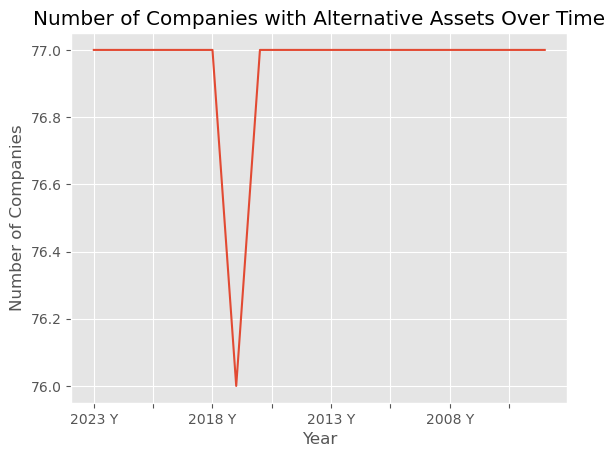

In [159]:
alternative_firms.plot()
plt.style.use('ggplot')
plt.title("Number of Companies with Alternative Assets Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.savefig("alternative_number_of_companies.png")
plt.show()

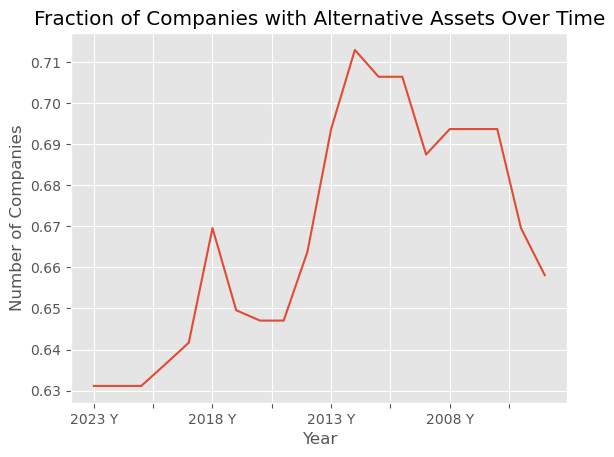

In [25]:
alternative_percentage.plot()
plt.style.use('ggplot')
plt.title("Fraction of Companies with Alternative Assets Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.savefig("alternative_fraction_of_companies.png")
plt.show()

### Confirm Accuracy of "Bond Yield" and "Alternatives Yield" Chart
- I will be manually looking through excel to check